In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

PLOT_DIR = "plots"
DATA_FILE = "data/data.csv"

if not os.path.exists(PLOT_DIR):
    os.mkdir(PLOT_DIR)

df = pd.read_csv(DATA_FILE)
df.head()

,pr_best_arm,len_ci,n_users,sim_no,needle,n_treatments,strategy
0,False,1769.626281,500,1,4c_PieceRate,40,random
1,False,625.773619,1000,1,4c_PieceRate,40,random
2,False,916.979300,1500,1,4c_PieceRate,40,random
3,False,725.557963,2000,1,4c_PieceRate,40,random
4,True,638.838368,2500,1,4c_PieceRate,40,random


In [16]:
gb = df[df.n_users == 4500].groupby(["n_treatments", "needle", "strategy"])
gb.pr_best_arm.count()

n_treatments  needle         strategy
40            10c_PieceRate  adaptive    1000
                             random      1000
              1c_PieceRate   adaptive    1000
                             random      1000
              4c_PieceRate   adaptive    1000
                             random      1000
50            10c_PieceRate  adaptive    1000
                             random      1000
              1c_PieceRate   adaptive    1000
                             random      1000
              4c_PieceRate   adaptive    1000
                             random      1000
60            10c_PieceRate  adaptive    1000
                             random      1000
              1c_PieceRate   adaptive    1000
                             random      1000
              4c_PieceRate   adaptive    1000
                             random      1000
70            10c_PieceRate  adaptive    1000
                             random      1000
              1c_PieceRate   adaptive    1

In [17]:
gb.pr_best_arm.mean()

n_treatments  needle         strategy
40            10c_PieceRate  adaptive    0.961
                             random      0.905
              1c_PieceRate   adaptive    0.560
                             random      0.393
              4c_PieceRate   adaptive    0.880
                             random      0.767
50            10c_PieceRate  adaptive    0.944
                             random      0.837
              1c_PieceRate   adaptive    0.484
                             random      0.315
              4c_PieceRate   adaptive    0.778
                             random      0.651
60            10c_PieceRate  adaptive    0.919
                             random      0.725
              1c_PieceRate   adaptive    0.411
                             random      0.236
              4c_PieceRate   adaptive    0.696
                             random      0.549
70            10c_PieceRate  adaptive    0.864
                             random      0.626
              1c_Piece

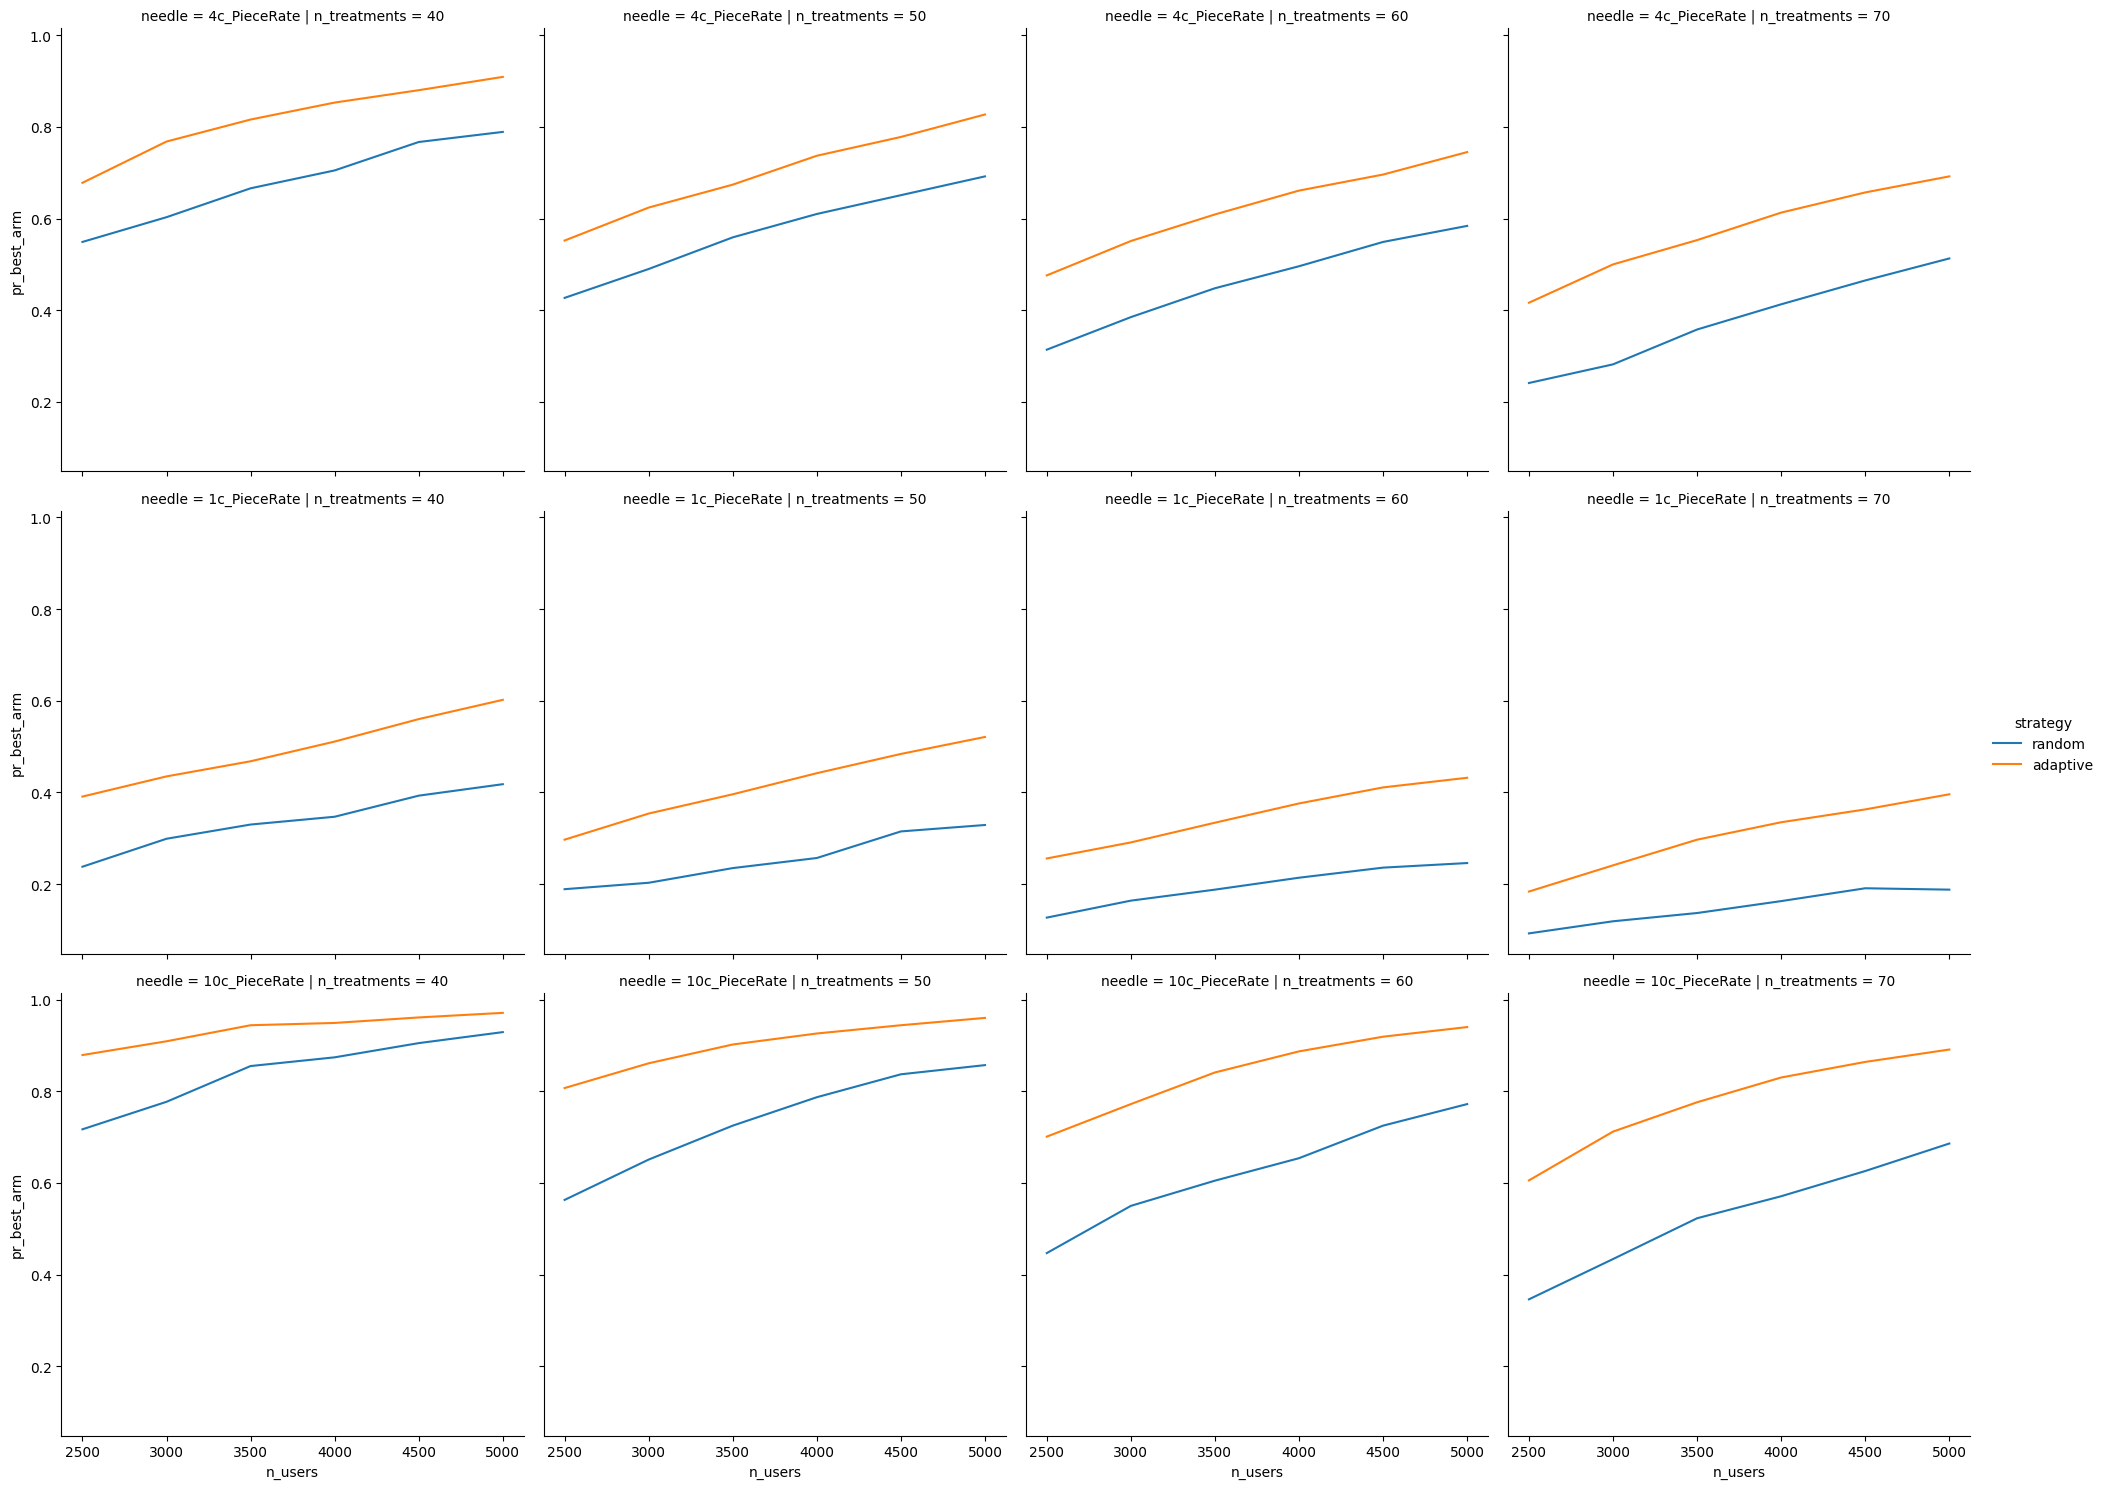

In [15]:
sns.relplot(
    data=df[df.n_users > 2000],
    x="n_users",
    y="pr_best_arm",
    hue="strategy",
    col="n_treatments",
    row="needle",
    kind="line",
    ci=None
)
plt.savefig(os.path.join(PLOT_DIR, "pr_best_arm.png"))
plt.show()

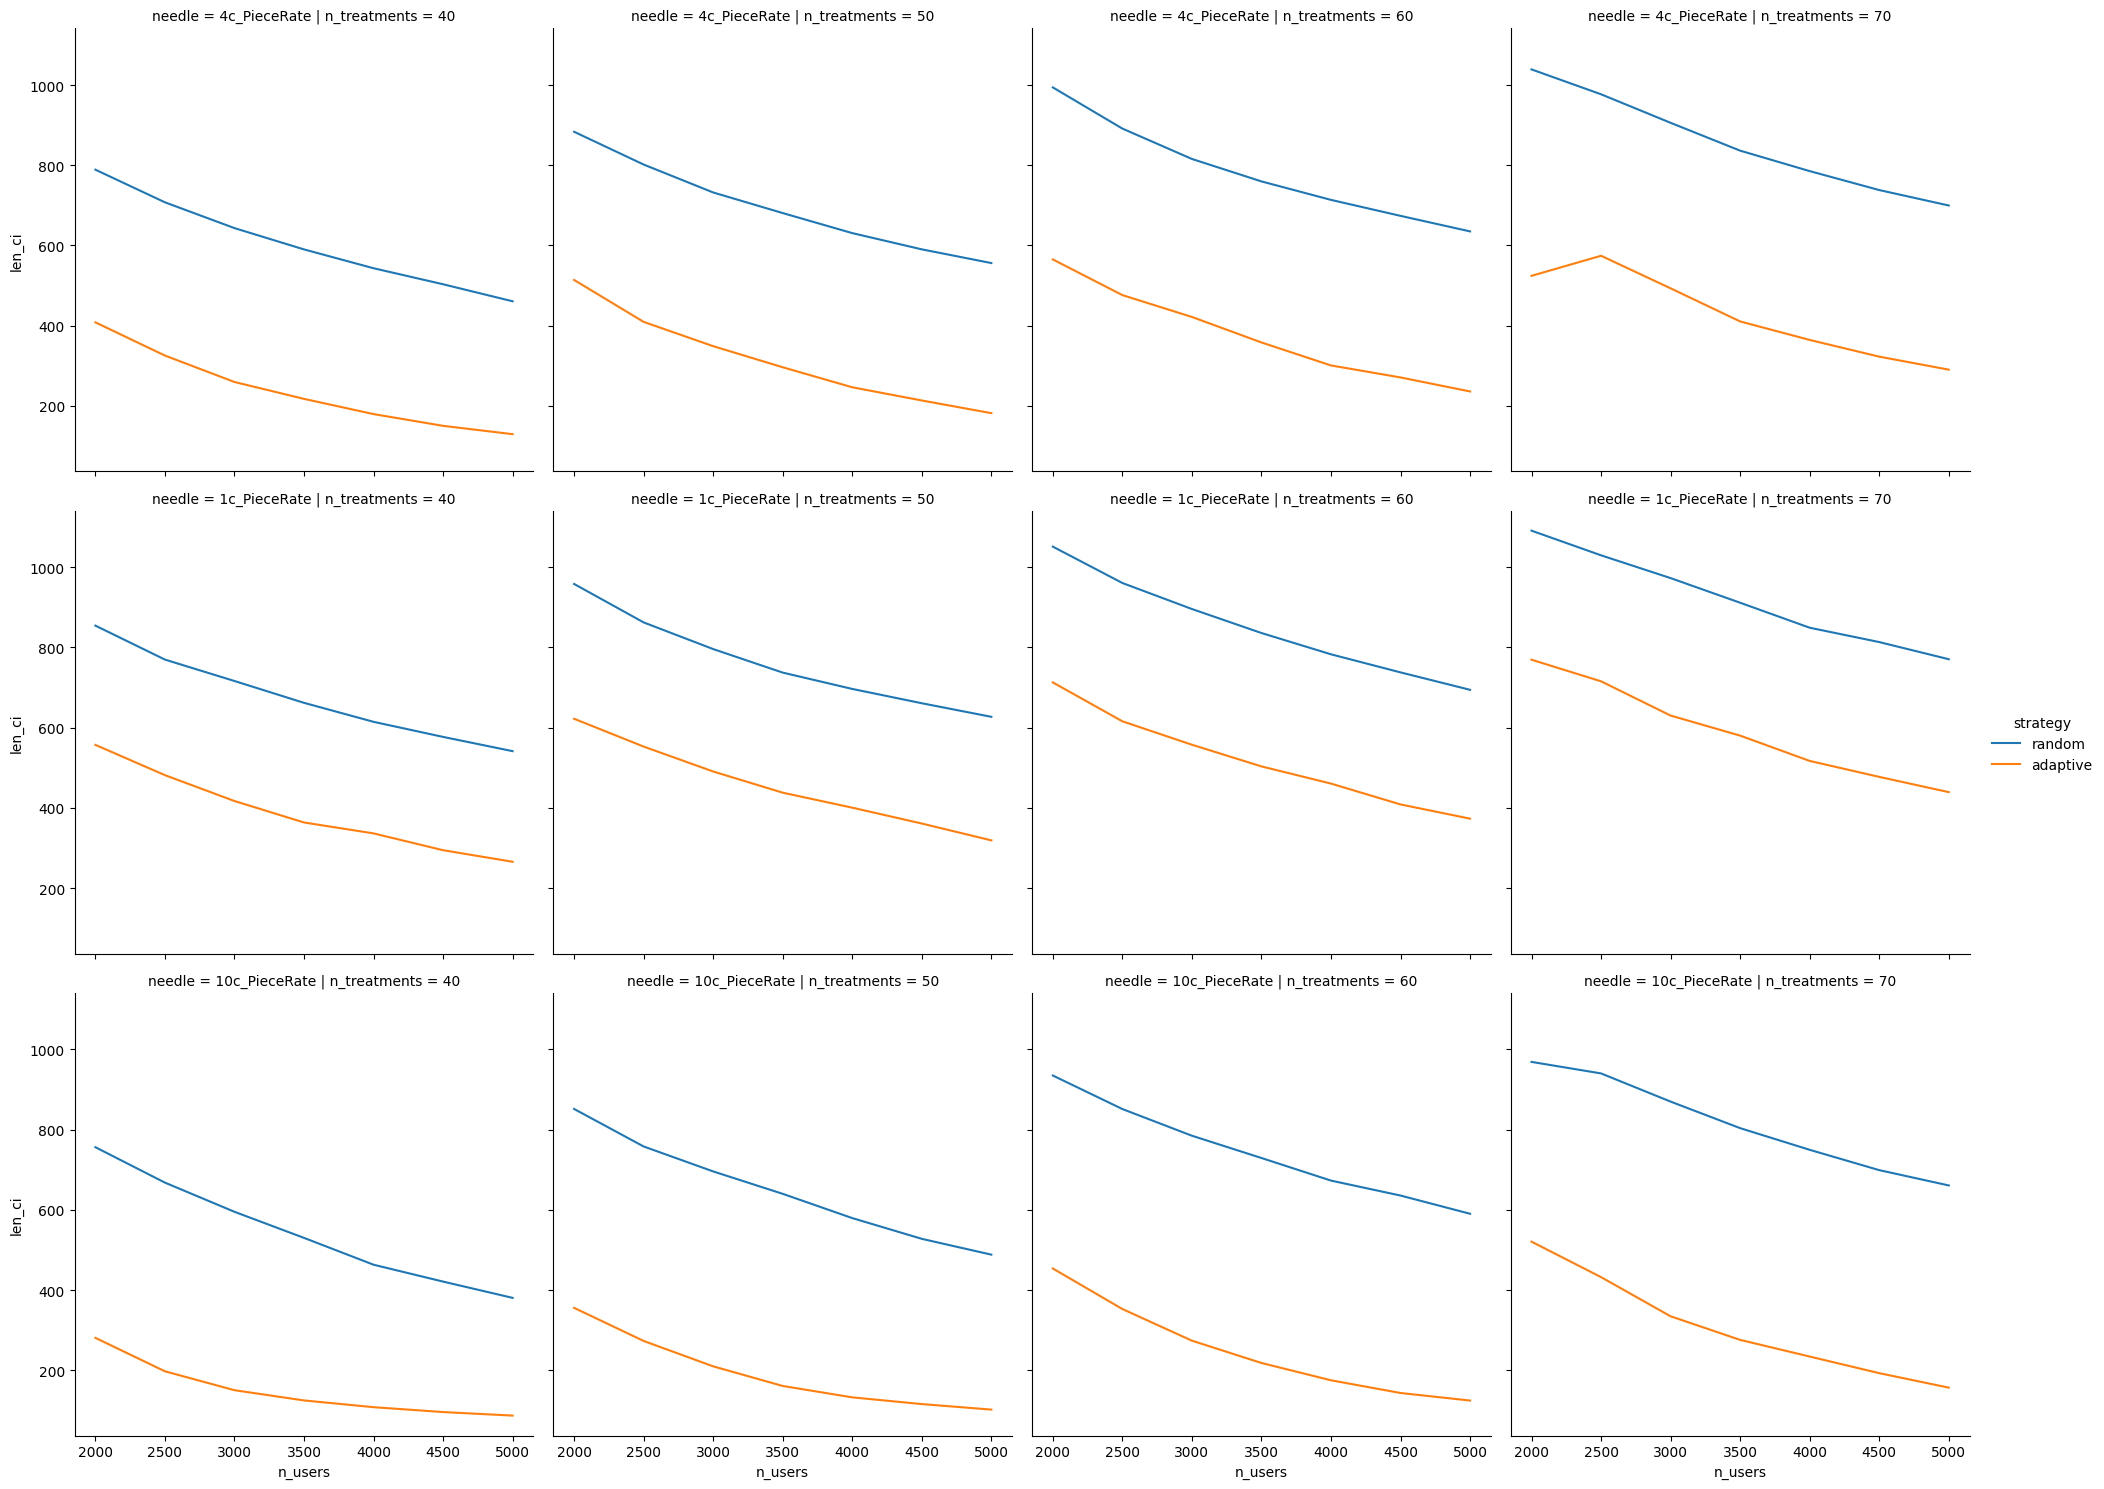

In [12]:
sns.relplot(
    data=df[df.n_users >= 2000],
    x="n_users",
    y="len_ci",
    hue="strategy",
    col="n_treatments",
    row="needle",
    kind="line",
    estimator=lambda x: np.quantile(x, .5),
    ci=None
)
plt.savefig(os.path.join(PLOT_DIR, "len_ci.png"))
plt.show()